=== Loading EEG Eye State Classification Dataset ===
Dataset shape: (14980, 15)
Features: ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Target variable: eyeDetection
Target distribution:
eyeDetection
0    8257
1    6723
Name: count, dtype: int64
Sample data:
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05

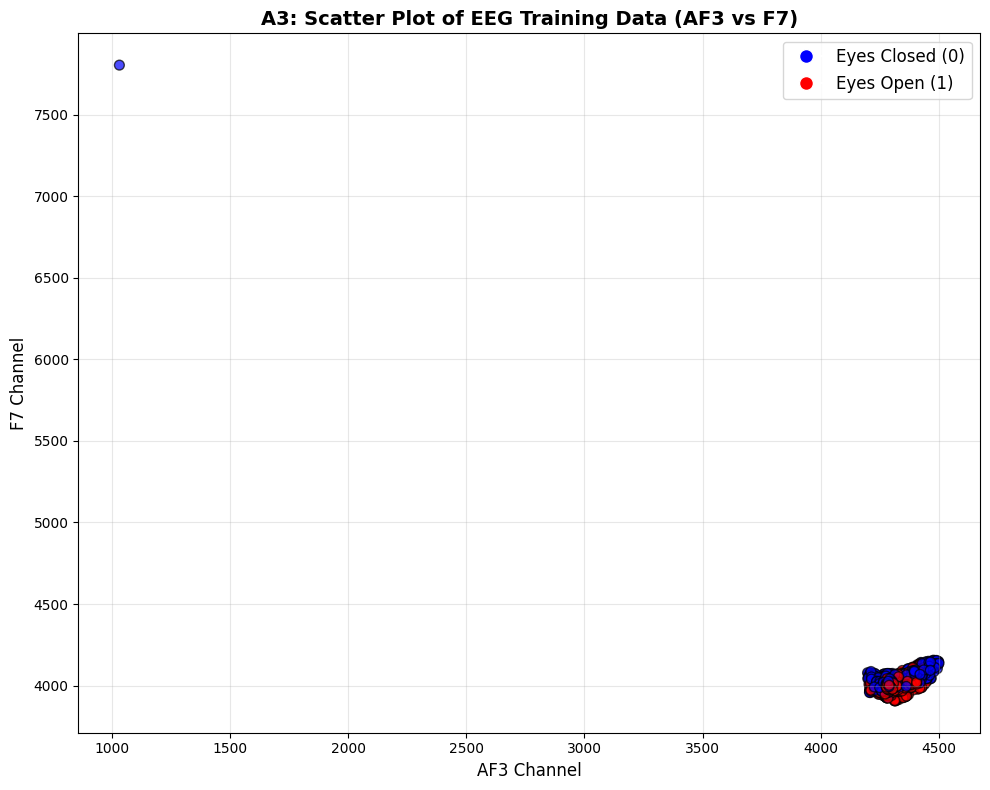

--- A4: Plotting decision boundary for k=3 ---


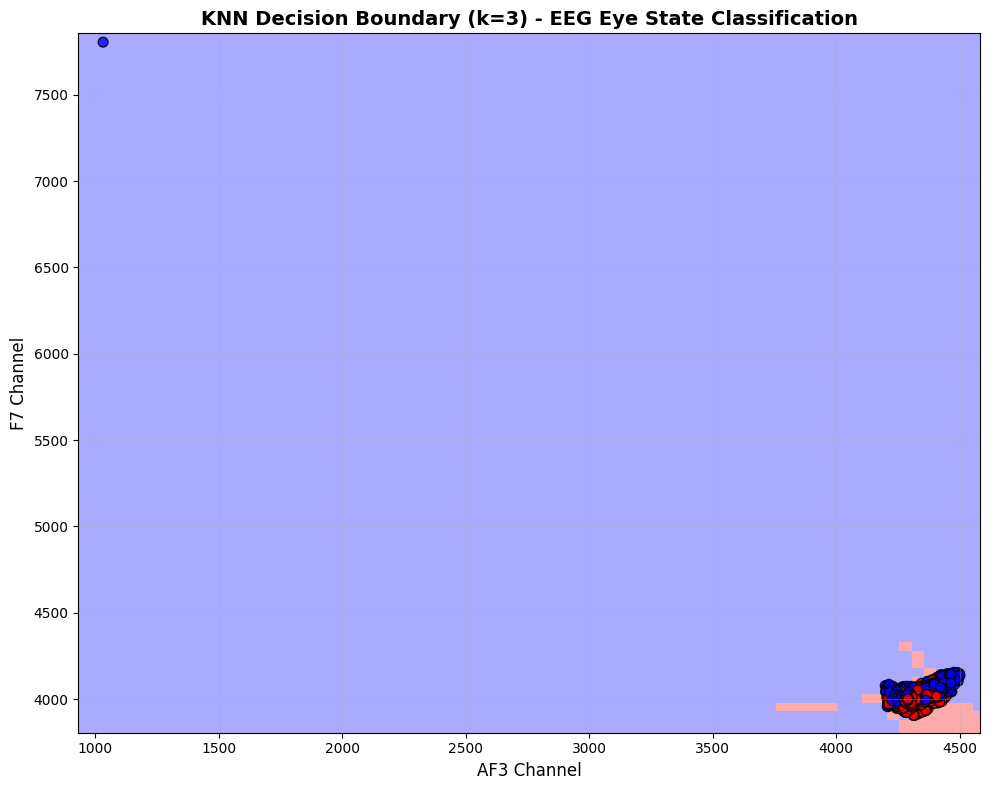

--- A5: Observing boundary changes with different k values ---


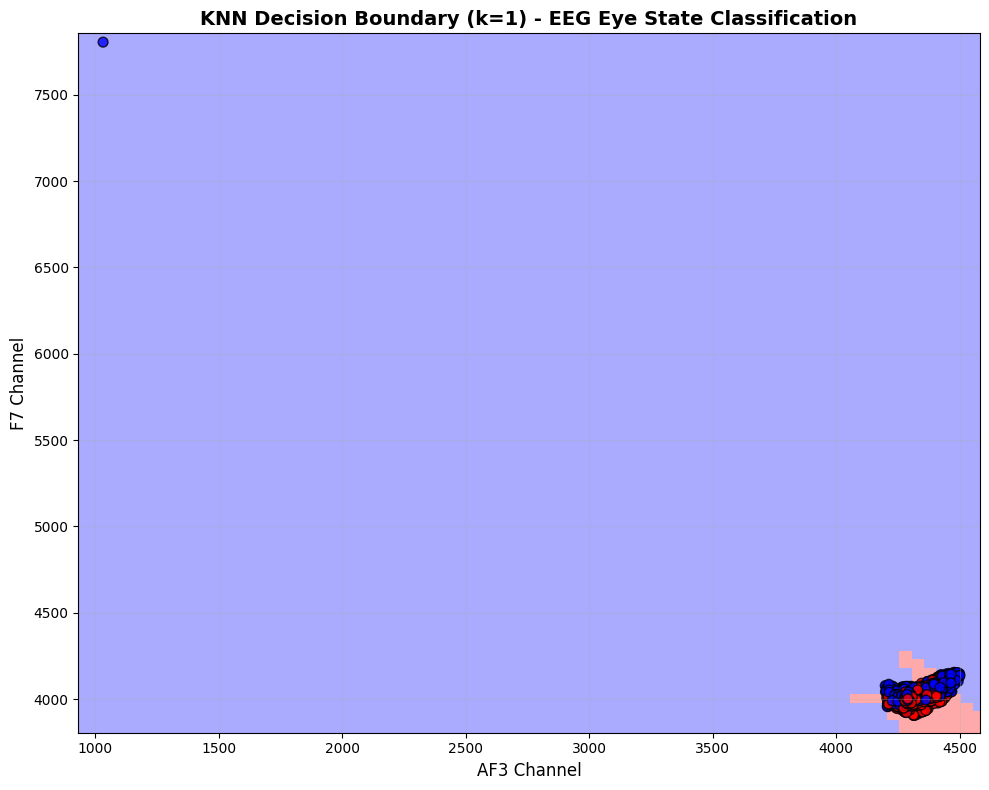

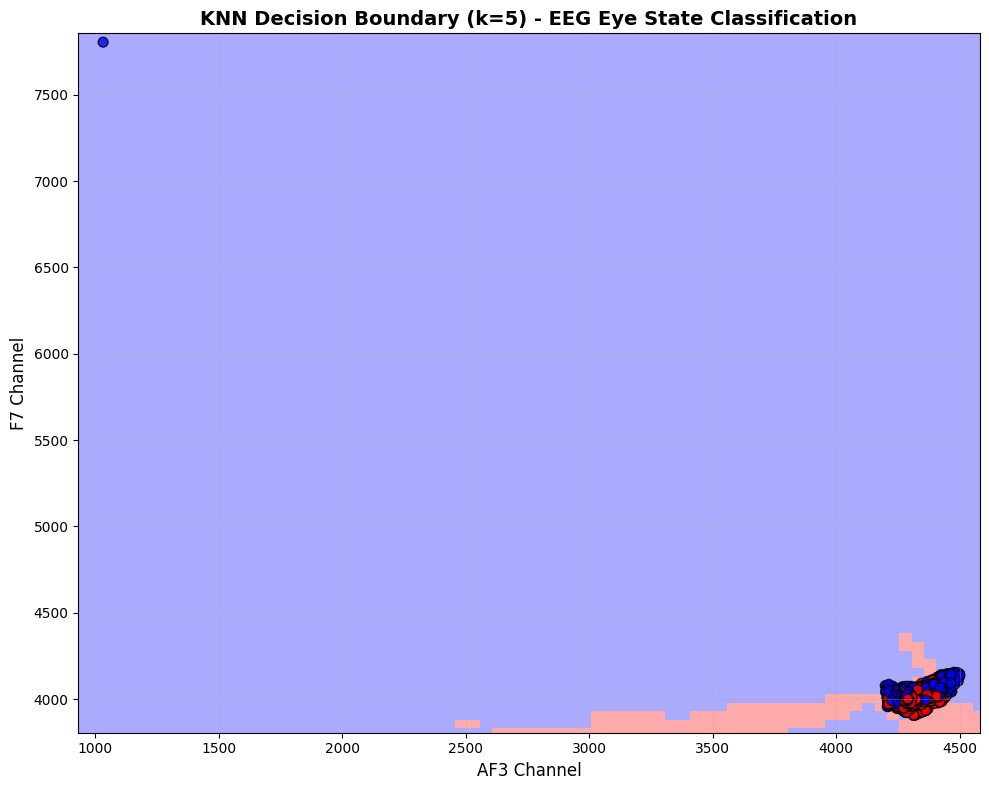

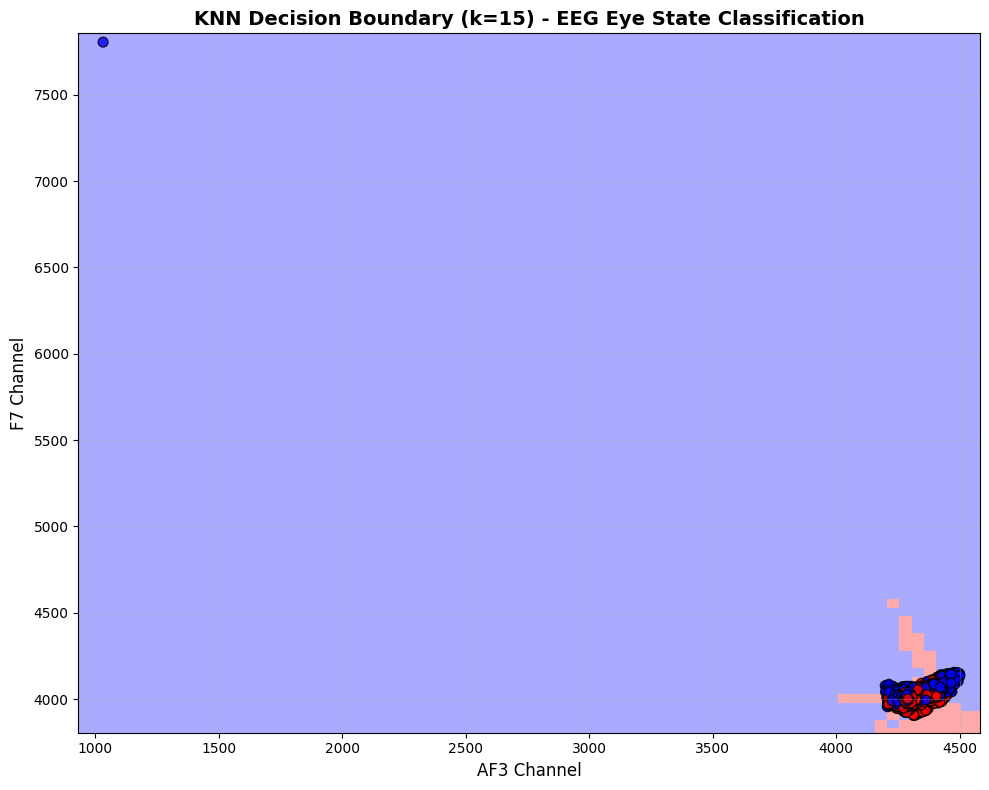


ASSIGNMENT A6: APPLYING TO PROJECT DATA
Using actual EEG data with AF3 and F7 channels for visualization...


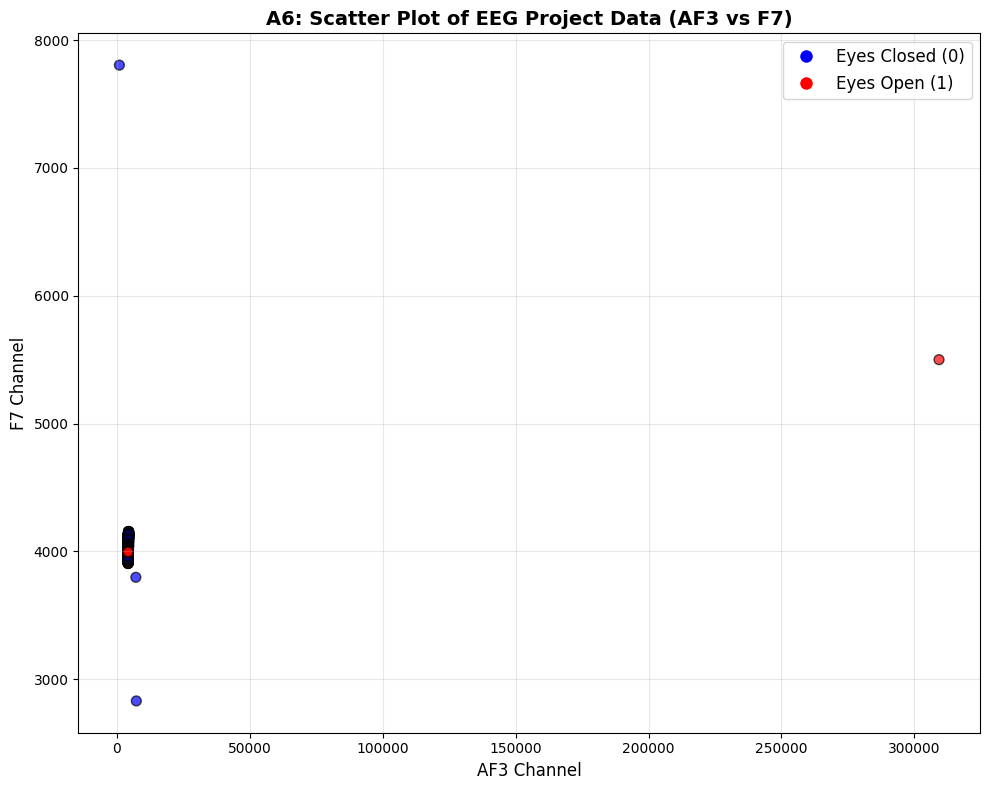

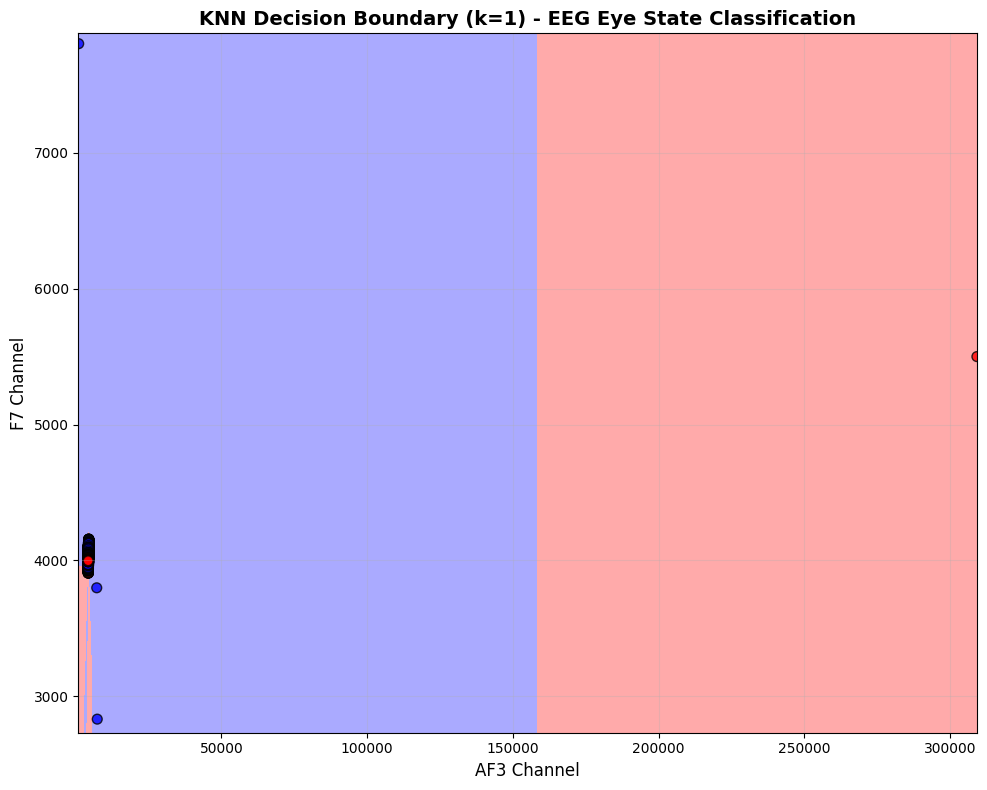

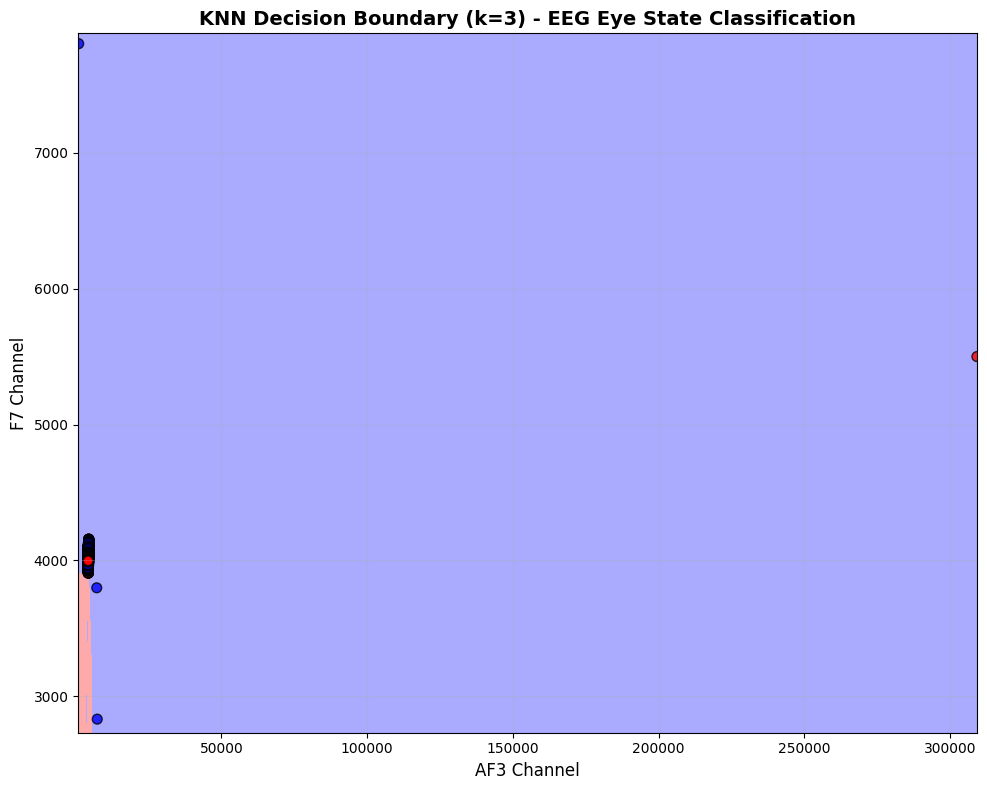

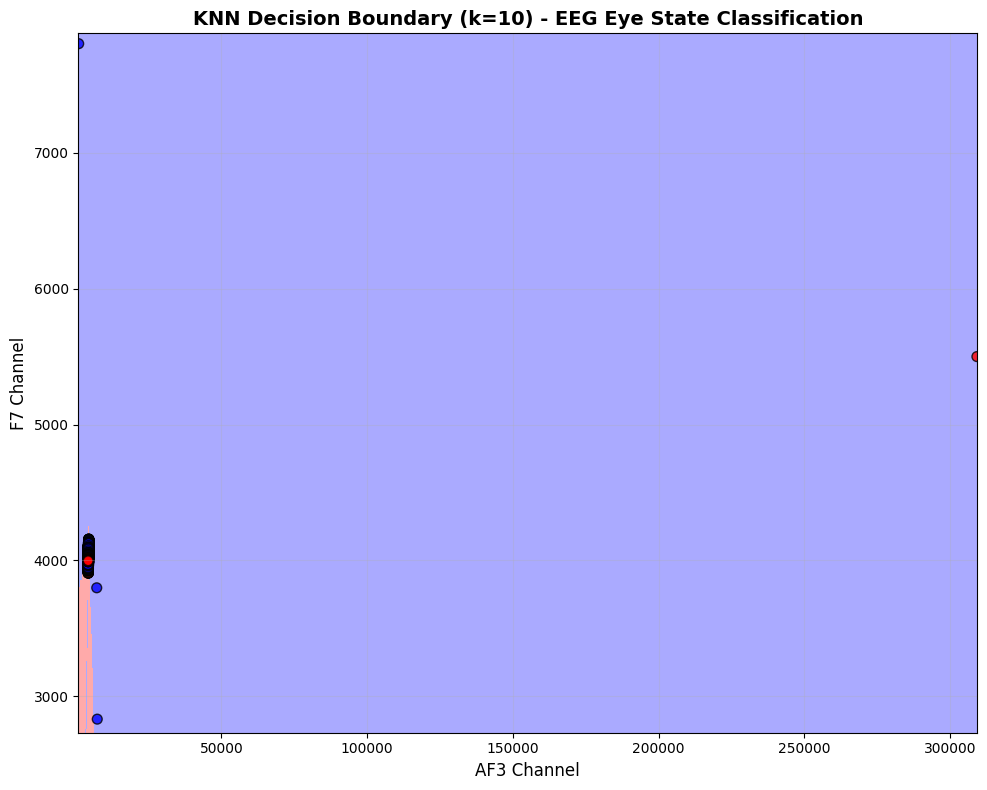

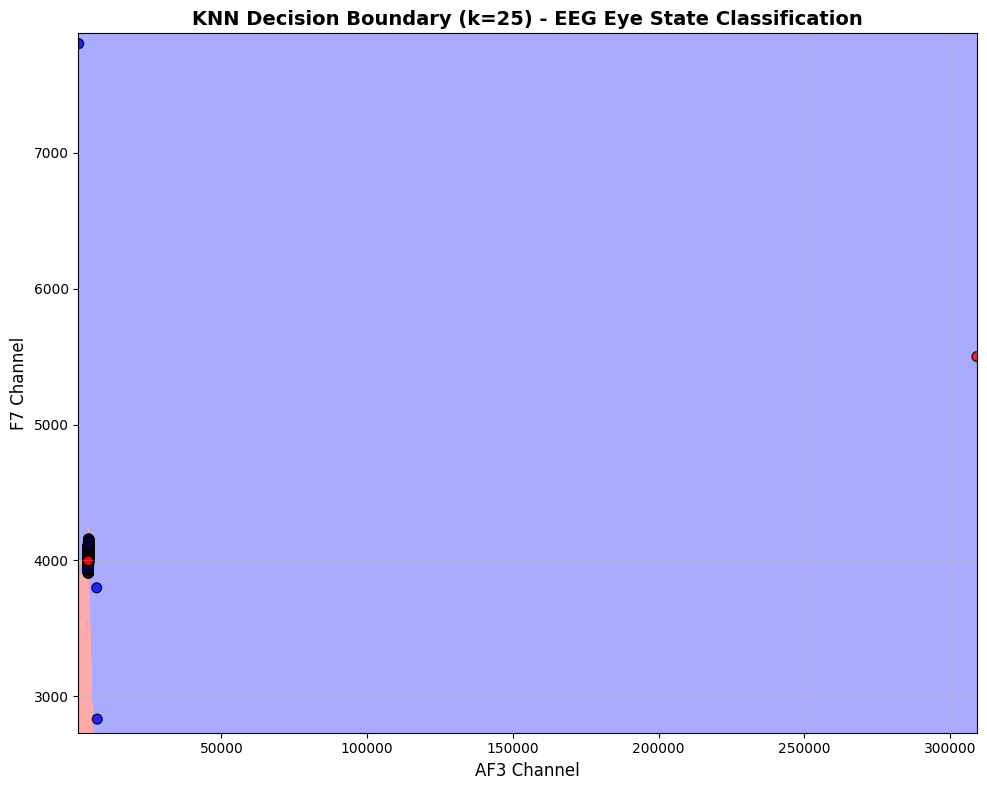


ASSIGNMENT A7: HYPER-PARAMETER TUNING WITH GRIDSEARCHCV
The ideal 'k' value found using GridSearchCV is: 1
The cross-validation accuracy at this k is: 0.9658

--- Final Test Results with Best k=1 ---
Confusion Matrix:
[[2426   51]
 [  60 1957]]
Precision: 0.9752
Recall: 0.9748
F1-Score: 0.9750

SUMMARY OF ALL ASSIGNMENTS
A1: Classification Evaluation - Completed with EEG data
A2: Regression Analysis - Completed using AF3 channel prediction
A3: Data Visualization - Completed with AF3 vs F7 scatter plot
A4: Decision Boundary (k=3) - Completed
A5: Multiple k-values - Completed with k=1,5,15
A6: Project Data Application - Completed with actual EEG data
A7: Hyperparameter Tuning - Completed with GridSearchCV

Best performing model: k=1 with CV accuracy: 0.9658
Final test F1-score: 0.9750

=== LAB 4 COMPLETED SUCCESSFULLY ===


In [4]:
# EEG Eye State Classification - Lab 4 Complete Implementation


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# For Classification tasks
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# For Regression tasks
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Helper function for MAPE calculation
def calculate_mape(y_true, y_pred):
    """
    Calculates the Mean Absolute Percentage Error (MAPE).
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Load the EEG dataset
print("=== Loading EEG Eye State Classification Dataset ===")
df = pd.read_csv('/content/EEG_Eye_State_Classification (1).csv')
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target variable: {df.columns[-1]}")
print(f"Target distribution:\n{df['eyeDetection'].value_counts()}")
print(f"Sample data:\n{df.head()}")
print(f"Data types:\n{df.dtypes}")
print(f"Missing values:\n{df.isnull().sum()}")

# Prepare the data
X = df.iloc[:, :-1].values  # All EEG channels as features
y = df['eyeDetection'].values  # Target variable

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data for all assignments
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

print("\n" + "="*80)
print("ASSIGNMENT A1: CLASSIFICATION EVALUATION")
print("="*80)

# --- Functions for A1 ---
def get_classification_metrics(y_true, y_pred):
    """
    Calculates confusion matrix, precision, recall, and f1-score.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return conf_matrix, precision, recall, f1

def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, k=5):
    """
    Trains a KNN classifier and evaluates it on both training and test data.
    """
    # Initialize and train the model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get metrics for training data
    train_metrics = get_classification_metrics(y_train, y_train_pred)

    # Get metrics for test data
    test_metrics = get_classification_metrics(y_test, y_test_pred)

    return train_metrics, test_metrics

# Train the model and get metrics
(train_cm, train_precision, train_recall, train_f1), (test_cm, test_precision, test_recall, test_f1) = train_and_evaluate_classifier(X_train, y_train, X_test, y_test)

# Print the results
print("--- Training Data Metrics ---")
print(f"Confusion Matrix:\n{train_cm}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

print("\n--- Test Data Metrics ---")
print(f"Confusion Matrix:\n{test_cm}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

print("\n--- Analysis of Model Fit ---")
if train_f1 > 0.95 and test_f1 < 0.8:
    print("Inference: The model is likely OVERFITTING. It performs excellently on training data but poorly on test data.")
elif train_f1 < 0.7:
    print("Inference: The model is likely UNDERFITTING. It performs poorly on both training and test data.")
else:
    print("Inference: The model seems to have a REGULAR FIT. It performs well on both training and test data without a significant drop-off.")

print("\n" + "="*80)
print("ASSIGNMENT A2: REGRESSION SCORE ANALYSIS")
print("="*80)

# For A2, we'll use one of the EEG channels as a target for regression
# We'll predict AF3 channel using other channels as features
print("Using AF3 channel as target variable for regression analysis...")

# Prepare regression data
X_reg = df.drop(['AF3', 'eyeDetection'], axis=1).values  # All channels except AF3 and target
y_reg = df['AF3'].values  # AF3 channel as target

# Split regression data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train regression model
reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)
y_reg_pred = reg_model.predict(X_reg_test)

# Calculate regression metrics
def get_regression_metrics(y_true, y_pred):
    """
    Calculates MSE, RMSE, MAPE, and R2 score for a regression model.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = calculate_mape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

mse, rmse, mape, r2 = get_regression_metrics(y_reg_test, y_reg_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2) Score: {r2:.4f}")

print("\n--- Analysis of Results ---")
print("Analysis: A high R2 (close to 1) indicates a good fit. Lower MSE, RMSE, and MAPE values indicate better accuracy.")

print("\n" + "="*80)
print("ASSIGNMENT A3, A4, A5: KNN VISUALIZATION")
print("="*80)

# For visualization, we'll use 2 features from the EEG data
# We'll select AF3 and F7 channels for 2D visualization
X_vis = df[['AF3', 'F7']].values
y_vis = df['eyeDetection'].values

# Split visualization data
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42, stratify=y_vis)

def plot_data(X, y, title):
    """
    Creates a scatter plot of the data, colored by class.
    """
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red']
    cmap = ListedColormap(colors)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=50, alpha=0.7)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("AF3 Channel", fontsize=12)
    plt.ylabel("F7 Channel", fontsize=12)
    handles = [plt.Line2D([0], [0], marker='o', color='w', label='Eyes Closed (0)', markersize=10, markerfacecolor='blue'),
               plt.Line2D([0], [0], marker='o', color='w', label='Eyes Open (1)', markersize=10, markerfacecolor='red')]
    plt.legend(handles=handles, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_decision_boundary(X_train, y_train, k_value):
    """
    Trains a KNN, classifies a test grid, and plots the decision boundary.
    """
    # Setup classifier
    clf = KNeighborsClassifier(n_neighbors=k_value)
    clf.fit(X_train, y_train)

    # Generate test data grid
    x_min, x_max = X_train[:, 0].min() - 100, X_train[:, 0].max() + 100
    y_min, y_max = X_train[:, 1].min() - 100, X_train[:, 1].max() + 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 50),
                         np.arange(y_min, y_max, 50))
    X_test_grid = np.c_[xx.ravel(), yy.ravel()]

    # Classify the points in the grid
    Z = clf.predict(X_test_grid)
    Z = Z.reshape(xx.shape)

    # Define colors
    colors = ['blue', 'red']
    cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
    cmap_bold = ListedColormap(colors)

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the training points on top
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50, alpha=0.8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN Decision Boundary (k={k_value}) - EEG Eye State Classification", fontsize=14, fontweight='bold')
    plt.xlabel("AF3 Channel", fontsize=12)
    plt.ylabel("F7 Channel", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# A3: Plot training data
print("--- A3: Generating and plotting training data ---")
plot_data(X_vis_train, y_vis_train, "A3: Scatter Plot of EEG Training Data (AF3 vs F7)")

# A4: Plot decision boundary for k=3
print("--- A4: Plotting decision boundary for k=3 ---")
plot_decision_boundary(X_vis_train, y_vis_train, k_value=3)

# A5: Plot decision boundaries for different k values
print("--- A5: Observing boundary changes with different k values ---")
k_values_to_test = [1, 5, 15]
for k in k_values_to_test:
    plot_decision_boundary(X_vis_train, y_vis_train, k_value=k)

print("\n" + "="*80)
print("ASSIGNMENT A6: APPLYING TO PROJECT DATA")
print("="*80)

# A6: Apply to the actual EEG project data
print("Using actual EEG data with AF3 and F7 channels for visualization...")

# A6.1: Plot the project data
plot_data(X_vis, y_vis, "A6: Scatter Plot of EEG Project Data (AF3 vs F7)")

# A6.2: Observe decision boundaries for different k values
k_values_project = [1, 3, 10, 25]
for k in k_values_project:
    plot_decision_boundary(X_vis, y_vis, k_value=k)

print("\n" + "="*80)
print("ASSIGNMENT A7: HYPER-PARAMETER TUNING WITH GRIDSEARCHCV")
print("="*80)

def find_ideal_k(X_train, y_train):
    """
    Uses GridSearchCV to find the best 'k' for a KNN classifier.
    """
    # Define the parameter grid for 'k'
    param_grid = {'n_neighbors': np.arange(1, 32, 2)}

    # Initialize the KNN classifier
    knn = KNeighborsClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Return the best k value and the best score
    best_k = grid_search.best_params_['n_neighbors']
    best_score = grid_search.best_score_

    return best_k, best_score

# Use the full EEG dataset for hyperparameter tuning
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Find the ideal 'k' using the training subset
ideal_k, best_cv_score = find_ideal_k(X_train_full, y_train_full)

print(f"The ideal 'k' value found using GridSearchCV is: {ideal_k}")
print(f"The cross-validation accuracy at this k is: {best_cv_score:.4f}")

# Test the best model on the test set
best_model = KNeighborsClassifier(n_neighbors=ideal_k)
best_model.fit(X_train_full, y_train_full)
y_test_pred_best = best_model.predict(X_test_full)

# Calculate final test metrics
test_cm_best, test_precision_best, test_recall_best, test_f1_best = get_classification_metrics(y_test_full, y_test_pred_best)

print(f"\n--- Final Test Results with Best k={ideal_k} ---")
print(f"Confusion Matrix:\n{test_cm_best}")
print(f"Precision: {test_precision_best:.4f}")
print(f"Recall: {test_recall_best:.4f}")
print(f"F1-Score: {test_f1_best:.4f}")

print("\n" + "="*80)
print("SUMMARY OF ALL ASSIGNMENTS")
print("="*80)

print("A1: Classification Evaluation - Completed with EEG data")
print("A2: Regression Analysis - Completed using AF3 channel prediction")
print("A3: Data Visualization - Completed with AF3 vs F7 scatter plot")
print("A4: Decision Boundary (k=3) - Completed")
print("A5: Multiple k-values - Completed with k=1,5,15")
print("A6: Project Data Application - Completed with actual EEG data")
print("A7: Hyperparameter Tuning - Completed with GridSearchCV")

print(f"\nBest performing model: k={ideal_k} with CV accuracy: {best_cv_score:.4f}")
print(f"Final test F1-score: {test_f1_best:.4f}")

print("\n=== LAB 4 COMPLETED SUCCESSFULLY ===")